In [376]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
%matplotlib inline


In [377]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb

In [475]:
ticker = ['^CNX100','BRITANNIA.NS','TORNTPHARM.NS',    
'SHREECEM.NS',      
'HAVELLS.NS',       
'PGHH.NS',          
'DABUR.NS',         
'MARICO.NS',        
'NESTLEIND.NS']
mydata = pd.DataFrame()
for t in ticker:
    mydata[t] = wb.DataReader(t, data_source='yahoo',start='2012-03-1',end='2020-03-23')['Close']

In [476]:
mydata = mydata.dropna()
mydata

,^CNX100,BRITANNIA.NS,TORNTPHARM.NS,SHREECEM.NS,HAVELLS.NS,PGHH.NS,DABUR.NS,MARICO.NS,NESTLEIND.NS
Date,,,,,,,,,
2012-03-01,5229.950195,261.825012,282.649994,2883.949951,106.610001,1936.599976,103.050003,77.926376,4377.399902
2012-03-02,5246.799805,269.200012,284.000000,2799.750000,105.940002,1940.050049,105.199997,77.951141,4419.850098
2012-03-05,5170.350098,271.174988,281.600006,2794.750000,103.650002,1950.199951,103.900002,78.669472,4458.799805
2012-03-06,5116.700195,268.674988,280.174988,2806.199951,105.180000,1951.000000,102.949997,77.901604,4462.350098
2012-03-07,5110.350098,266.200012,281.024994,2784.500000,109.339996,1962.050049,103.849998,78.074997,4422.799805
...,...,...,...,...,...,...,...,...,...
2020-03-17,9105.400391,2686.000000,1986.000000,20005.500000,569.849976,10003.950195,430.399994,249.149994,14541.000000
2020-03-18,8607.950195,2501.949951,1815.250000,19293.949219,560.000000,10039.200195,414.549988,248.850006,13536.799805
2020-03-19,8388.700195,2318.149902,1772.099976,17731.449219,535.200012,9507.000000,418.850006,248.300003,13120.299805


In [431]:
mydata.columns

Index(['^CNX100', 'BRITANNIA.NS', 'TORNTPHARM.NS', 'SHREECEM.NS', 'HAVELLS.NS',
       'PGHH.NS', 'DABUR.NS', 'MARICO.NS', 'NESTLEIND.NS'],
      dtype='object')

In [460]:
df1 = df1.rename(columns={'BRITANNIA.NS':'BRITANNIA','TORNTPHARM.NS':'TORNTPHARM','SHREECEM.NS':'SHREECEM','HAVELLS.NS':'HAVELLS','PGHH.NS':'PGHH','DABUR.NS':'DABUR','MARICO.NS':'MARICO','NESTLEIND.NS':'NESTLEIND'})

<AxesSubplot:>

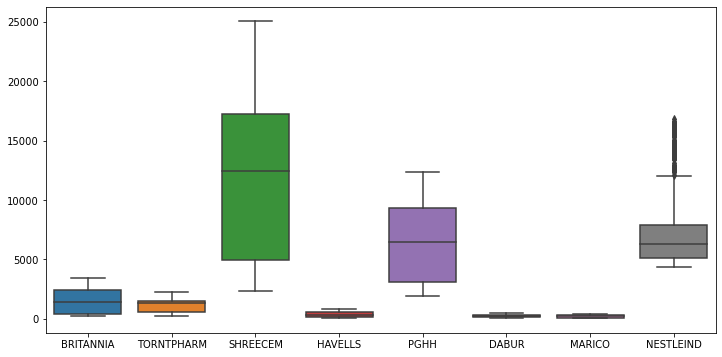

In [462]:
df1 = mydata[['BRITANNIA.NS', 'TORNTPHARM.NS', 'SHREECEM.NS', 'HAVELLS.NS',
       'PGHH.NS', 'DABUR.NS', 'MARICO.NS', 'NESTLEIND.NS']]
df1 = df1.rename(columns={'BRITANNIA.NS':'BRITANNIA','TORNTPHARM.NS':'TORNTPHARM','SHREECEM.NS':'SHREECEM','HAVELLS.NS':'HAVELLS','PGHH.NS':'PGHH','DABUR.NS':'DABUR','MARICO.NS':'MARICO','NESTLEIND.NS':'NESTLEIND'})
plt.figure(figsize=(12,6))
sns.boxplot(data=df1)

In [459]:
df1 = df1.rename(columns={'BRITANNIA.NS':'BRITANNIA','TORNTPHARM.NS':'TORNTPHARM','SHREECEM.NS':'SHREECEM','HAVELLS.NS':'HAVELLS','PGHH.NS':'PGHH','DABUR.NS':'DABUR','MARICO.NS':'MARICO','NESTLEIND.NS':'NESTLEIND'})

<AxesSubplot:xlabel='Date'>

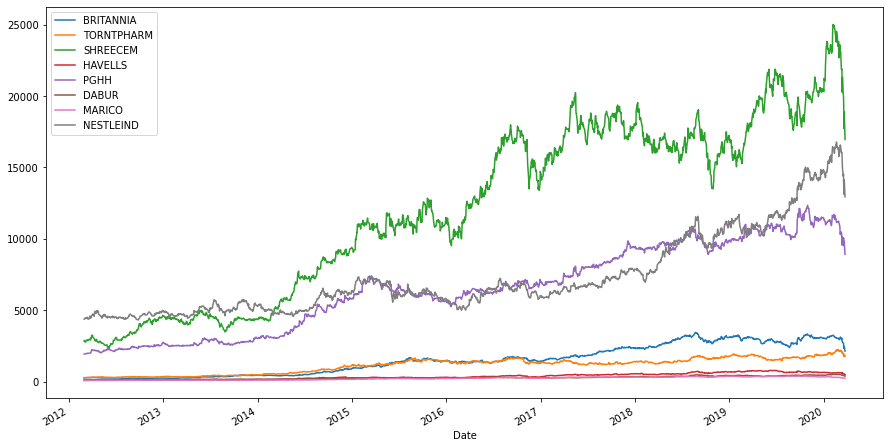

In [463]:
# plt.figure(figsize=(15,8))
df1.plot(figsize=(15,8))

In [380]:
r = (mydata/mydata.shift(1) - 1)
r = r.dropna()
y = r.drop('^CNX100',axis=1)
X = r[['^CNX100']]

In [381]:
from sklearn.linear_model import LinearRegression

In [7]:
lr = LinearRegression()
lr = lr.fit(X,y)
lr.predict(X)


array([[ 0.00322512,  0.00270713,  0.00358169, ...,  0.00265632,
         0.00214529,  0.00206143],
       [-0.00887786, -0.00691207, -0.01150375, ..., -0.00844445,
        -0.00653964, -0.00633055],
       [-0.00602479, -0.00464451, -0.00794761, ..., -0.00582763,
        -0.00449231, -0.00435229],
       ...,
       [-0.01629231, -0.01280492, -0.02074529, ..., -0.01524492,
        -0.01186014, -0.01147159],
       [ 0.03860608,  0.03082719,  0.04768134, ...,  0.03510746,
         0.02753418,  0.02659391],
       [-0.08602722, -0.06822879, -0.10766448, ..., -0.07920523,
        -0.06190093, -0.05982445]])

In [8]:
lr.coef_

array([[0.6802302 ],
       [0.54063294],
       [0.84785459],
       [0.90535816],
       [0.34828192],
       [0.62390181],
       [0.48812363],
       [0.47165868]])

In [9]:
r.mean()

^CNX100          0.000248
BRITANNIA.NS     0.001203
TORNTPHARM.NS    0.001100
SHREECEM.NS      0.001061
HAVELLS.NS       0.000977
PGHH.NS          0.000865
DABUR.NS         0.000801
MARICO.NS        0.000694
NESTLEIND.NS     0.000659
dtype: float64

In [374]:
mydata['BRITANNIA.NS']

Date
2012-03-01          NaN
2012-03-02          NaN
2012-03-05          NaN
2012-03-06          NaN
2012-03-07    -1.487307
                ...    
2020-03-17     2.386769
2020-03-18     2.217755
2020-03-19    -0.926128
2020-03-20    26.334814
2020-03-23    -1.023457
Name: BRITANNIA.NS, Length: 1979, dtype: float64

In [382]:
from statsmodels.tsa.stattools import adfuller
result=adfuller(mydata['BRITANNIA.NS'], autolag='AIC')
result[1]

0.6954398032351753

In [387]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler(feature_range=(0,1))
# df = scaler.fit_transform(mydata[['BRITANNIA.NS']])
# df = pd.DataFrame(df)
# df  

In [388]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")


In [465]:
stepwise_fit = auto_arima(mydata['BRITANNIA.NS'], trace=True, suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=18975.913, Time=1.88 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=18983.386, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=18981.465, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=18981.653, Time=0.29 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=18983.453, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=18978.424, Time=0.67 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=18978.535, Time=1.02 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=18966.735, Time=2.36 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=18970.776, Time=0.42 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=18966.663, Time=2.50 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=18972.332, Time=1.52 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=18966.722, Time=2.90 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=18967.757, Time=2.79 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=18967.177, Time=2.86 sec
 ARIMA(5,1,1)(0,0,0

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1979
Model:               SARIMAX(5, 1, 2)   Log Likelihood               -9474.944
Date:                Thu, 05 May 2022   AIC                          18965.889
Time:                        17:51:13   BIC                          19010.607
Sample:                             0   HQIC                         18982.318
                               - 1979                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5850      0.062     -9.395      0.000      -0.707      -0.463
ar.L2         -0.7820      0.060    -12.932      0.000      -0.900      -0.663
ar.L3          0.1431      0.018      7.805      0.000       0.107       0.179
ar.L4          0.0968      0.018      5.327      0.000       0.061       0.132
ar.L5          0.0490      0.019      2.512      0.012       0.011       0.087
ma.L1          0.6316      0.061     10.319      0.000       0.512       0.752
ma.L2          0.8371      0.061     13.770      0.000       0.718       0.956
sigma2       847.6130     11.003     77.036      0.000     826.048     869.178
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             19669.75
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):              36.87   Skew:                            -0.49
Prob(H) (two-sided):                  0.00   Kurtosis:                        18.42
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [466]:
stepwise_fit = auto_arima(mydata['TORNTPHARM.NS'], trace=True, suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=18110.443, Time=1.04 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=18118.050, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=18115.599, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=18114.970, Time=0.24 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=18118.134, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=18112.008, Time=0.69 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=18111.512, Time=0.38 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=18111.136, Time=2.04 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=18112.087, Time=1.72 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=18112.882, Time=0.50 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=18113.860, Time=0.99 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=18113.391, Time=1.43 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=18113.608, Time=2.70 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=18110.855, Time=0.57 sec

Best model:  ARIMA

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1979
Model:               SARIMAX(2, 1, 2)   Log Likelihood               -9049.221
Date:                Thu, 05 May 2022   AIC                          18110.443
Time:                        17:54:31   BIC                          18143.982
Sample:                             0   HQIC                         18122.765
                               - 1979                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.2058      0.815      1.480      0.139      -0.391       2.802
ar.L1         -0.0642      0.185     -0.348      0.728      -0.426       0.298
ar.L2         -0.5282      0.154     -3.430      0.001      -0.830      -0.226
ma.L1          0.0190      0.193      0.099      0.921      -0.358       0.396
ma.L2          0.4646      0.160      2.911      0.004       0.152       0.778
sigma2       551.1841      8.511     64.758      0.000     534.502     567.866
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):              4238.99
Prob(Q):                              0.88   Prob(JB):                         0.00
Heteroskedasticity (H):              12.94   Skew:                            -0.20
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [457]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

# df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/wwwusage.csv', names=['value'], header=0)
# df = mydata['BRITANNIA.NS']
# df = mydata['BRITANNIA.NS']
# df = pd.DataFrame({'value':df.values})
ddf = mydata['BRITANNIA.NS']

model = pm.auto_arima(ddf, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
model.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=18976.924, Time=0.84 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=18983.386, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=18981.465, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=18981.653, Time=0.28 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=18983.453, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=18978.535, Time=1.04 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=18978.424, Time=0.67 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=18982.733, Time=0.53 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=18981.986, Time=0.11 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=18975.913, Time=1.83 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=18966.735, Time=2.33 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=18970.776, Time=0.47 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=18967.177, Time=2.84 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=18968.149, Time=1.53 sec
 ARIMA(3,1,2)(0,0,0

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1979
Model:               SARIMAX(3, 1, 2)   Log Likelihood               -9477.144
Date:                Thu, 05 May 2022   AIC                          18966.289
Time:                        13:22:47   BIC                          18999.828
Sample:                             0   HQIC                         18978.610
                               - 1979                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0772      0.100      0.769      0.442      -0.119       0.274
ar.L2         -0.5023      0.103     -4.879      0.000      -0.704      -0.301
ar.L3          0.1195      0.017      7.202      0.000       0.087       0.152
ma.L1         -0.0296      0.101     -0.292      0.770      -0.228       0.169
ma.L2          0.5188      0.103      5.013      0.000       0.316       0.722
sigma2       850.7059     10.267     82.858      0.000     830.583     870.829
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):             20819.41
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):              37.09   Skew:                            -0.48
Prob(H) (two-sided):                  0.00   Kurtosis:                        18.86
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:>

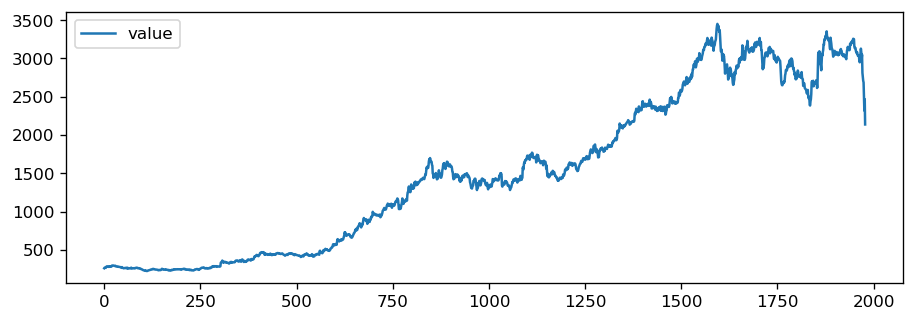

In [321]:
df.plot()

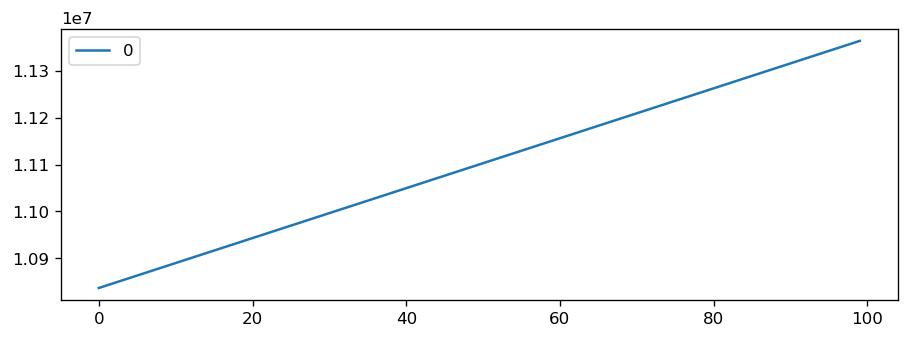

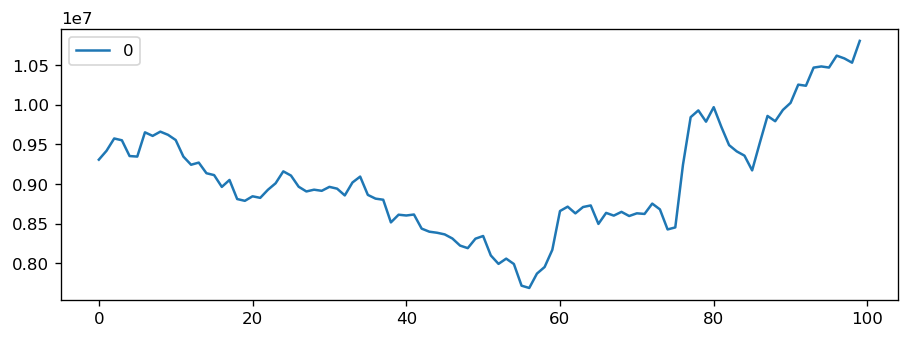

In [322]:
pd.DataFrame(scaler.inverse_transform([model.predict(100)])).transpose().plot()
pd.DataFrame(scaler.inverse_transform(df[1779:1879])).plot()
plt.legend()

In [344]:
tf = pd.DataFrame({'obs':df.value[1879:],'predict':model.predict(100)})
tf

,obs,predict
1879,3290.100098,3361.314835
1880,3266.600098,3362.964727
1881,3268.550049,3364.614618
1882,3239.850098,3366.264510
1883,3231.750000,3367.914402
...,...,...
1974,2686.000000,3518.054556
1975,2501.949951,3519.704447
1976,2318.149902,3521.354339
1977,2467.800049,3523.004231


In [347]:
# cd = pd.DataFrame({'predict':model.predict(100)})

In [348]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(tf.obs,tf.predict))

433.4510853338803

In [474]:
stepwise_fit = auto_arima(mydata['TORNTPHARM.NS'], trace=True, suppress_warnings=True,seasonal=False)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=18110.443, Time=1.20 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=18118.050, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=18115.599, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=18114.970, Time=0.31 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=18118.134, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=18112.008, Time=0.83 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=18111.512, Time=0.43 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=18111.136, Time=2.36 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=18112.087, Time=1.80 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=18112.882, Time=0.55 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=18113.860, Time=0.95 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=18113.391, Time=1.39 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=18113.608, Time=2.55 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=18110.855, Time=0.58 sec

Best model:  ARIMA

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1979
Model:               SARIMAX(2, 1, 2)   Log Likelihood               -9049.221
Date:                Thu, 05 May 2022   AIC                          18110.443
Time:                        18:15:13   BIC                          18143.982
Sample:                             0   HQIC                         18122.765
                               - 1979                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.2058      0.815      1.480      0.139      -0.391       2.802
ar.L1         -0.0642      0.185     -0.348      0.728      -0.426       0.298
ar.L2         -0.5282      0.154     -3.430      0.001      -0.830      -0.226
ma.L1          0.0190      0.193      0.099      0.921      -0.358       0.396
ma.L2          0.4646      0.160      2.911      0.004       0.152       0.778
sigma2       551.1841      8.511     64.758      0.000     534.502     567.866
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):              4238.99
Prob(Q):                              0.88   Prob(JB):                         0.00
Heteroskedasticity (H):              12.94   Skew:                            -0.20
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [464]:
df = mydata['TORNTPHARM.NS']
df = pd.DataFrame({'value':df.values})

model = pm.auto_arima(df.value, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
model.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=18112.882, Time=0.60 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=18118.050, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=18115.599, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=18114.970, Time=0.28 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=18118.134, Time=0.05 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=18111.512, Time=0.45 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=18109.537, Time=0.10 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=18111.491, Time=0.19 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=18113.391, Time=1.55 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=18110.145, Time=0.05 sec

Best model:  ARIMA(2,1,0)(0,0,0)[0] intercept
Total fit time: 3.422 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1979
Model:               SARIMAX(2, 1, 0)   Log Likelihood               -9050.768
Date:                Thu, 05 May 2022   AIC                          18109.537
Time:                        17:49:00   BIC                          18131.896
Sample:                             0   HQIC                         18117.751
                               - 1979                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.8558      0.532      1.609      0.108      -0.187       1.898
ar.L1         -0.0500      0.016     -3.185      0.001      -0.081      -0.019
ar.L2         -0.0644      0.014     -4.574      0.000      -0.092      -0.037
sigma2       552.5528      8.380     65.940      0.000     536.129     568.977
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              4398.80
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):              12.96   Skew:                            -0.22
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.29
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [469]:
df = mydata['SHREECEM.NS']
df = pd.DataFrame({'value':df.values})
# df = df[0:1879]
model = pm.auto_arima(df.value, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
model.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=27433.352, Time=0.41 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=27432.837, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=27434.523, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=27434.572, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=27432.461, Time=0.02 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.668 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1979
Model:               SARIMAX(0, 1, 0)   Log Likelihood              -13715.231
Date:                Thu, 05 May 2022   AIC                          27432.461
Time:                        18:01:19   BIC                          27438.051
Sample:                             0   HQIC                         27434.515
                               - 1979                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      6.166e+04    933.883     66.026      0.000    5.98e+04    6.35e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.30   Jarque-Bera (JB):              3873.77
Prob(Q):                              0.58   Prob(JB):                         0.00
Heteroskedasticity (H):              17.26   Skew:                            -0.21
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.84
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [470]:
stepwise_fit = auto_arima(mydata['SHREECEM.NS'], trace=True, suppress_warnings=True,seasonal=False)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=27418.464, Time=1.47 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=27432.837, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=27434.523, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=27434.572, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=27432.461, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=27424.450, Time=0.52 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=27424.604, Time=0.39 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=27428.581, Time=0.59 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=27414.758, Time=1.35 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=27421.899, Time=0.77 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=27414.298, Time=2.62 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=27416.454, Time=2.28 sec
 ARIMA(3,1,4)(0,0,0)[0] intercept   : AIC=27416.436, Time=3.03 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=27415.048, Time=2.41 sec
 ARIMA(4,1,2)(0,0,0

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1979
Model:               SARIMAX(4, 1, 5)   Log Likelihood              -13689.987
Date:                Thu, 05 May 2022   AIC                          27399.974
Time:                        18:02:54   BIC                          27455.872
Sample:                             0   HQIC                         27420.510
                               - 1979                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.5830      0.102    -15.476      0.000      -1.783      -1.382
ar.L2         -1.7577      0.123    -14.296      0.000      -1.999      -1.517
ar.L3         -1.4652      0.121    -12.135      0.000      -1.702      -1.229
ar.L4         -0.5017      0.100     -5.041      0.000      -0.697      -0.307
ma.L1          1.5788      0.106     14.962      0.000       1.372       1.786
ma.L2          1.8464      0.126     14.692      0.000       1.600       2.093
ma.L3          1.5771      0.124     12.769      0.000       1.335       1.819
ma.L4          0.6086      0.100      6.086      0.000       0.413       0.805
ma.L5          0.1185      0.018      6.758      0.000       0.084       0.153
sigma2       6.12e+04   1136.175     53.861      0.000     5.9e+04    6.34e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              2450.74
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):              16.24   Skew:                            -0.07
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.45
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [471]:
stepwise_fit = auto_arima(mydata['HAVELLS.NS'], trace=True, suppress_warnings=True,seasonal=False)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=13818.786, Time=1.92 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=13826.257, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=13828.256, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=13828.256, Time=0.19 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=13825.480, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=13829.632, Time=1.51 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=13829.634, Time=1.50 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=13828.210, Time=2.63 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=13821.117, Time=2.32 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=13830.256, Time=0.22 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=13833.109, Time=1.19 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=13833.098, Time=0.94 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=13826.206, Time=3.05 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=13818.031, Time=1.39 sec
 ARIMA(1,1,2)(0,0,0

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1979
Model:               SARIMAX(2, 1, 2)   Log Likelihood               -6904.016
Date:                Thu, 05 May 2022   AIC                          13818.031
Time:                        18:05:33   BIC                          13845.981
Sample:                             0   HQIC                         13828.300
                               - 1979                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1937      0.008    -23.159      0.000      -0.210      -0.177
ar.L2         -0.9883      0.008   -126.824      0.000      -1.004      -0.973
ma.L1          0.1961      0.012     16.850      0.000       0.173       0.219
ma.L2          0.9747      0.011     86.772      0.000       0.953       0.997
sigma2        62.9775      0.837     75.202      0.000      61.336      64.619
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              9722.53
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):              10.22   Skew:                             0.39
Prob(H) (two-sided):                  0.00   Kurtosis:                        13.83
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [156]:
df = mydata['HAVELLS.NS']
df = pd.DataFrame({'value':df.values})
df
model = pm.auto_arima(df.value, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
model.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=13830.256, Time=0.33 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=13826.257, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=13828.256, Time=0.16 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=13828.256, Time=0.26 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=13825.480, Time=0.06 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.869 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1979
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -6911.740
Date:                Tue, 03 May 2022   AIC                          13825.480
Time:                        19:42:14   BIC                          13831.070
Sample:                             0   HQIC                         13827.534
                               - 1979                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2        63.4816      0.816     77.815      0.000      61.883      65.081
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              8652.54
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):              10.16   Skew:                             0.33
Prob(H) (two-sided):                  0.00   Kurtosis:                        13.23
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [157]:
df = mydata['PGHH.NS']
df = pd.DataFrame({'value':df.values})
df
model = pm.auto_arima(df.value, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
model.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=23692.319, Time=0.90 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=23694.084, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=23695.393, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=23695.296, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=23694.729, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=23690.835, Time=1.09 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=23689.438, Time=0.19 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=23690.481, Time=0.21 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=23692.477, Time=0.25 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=23690.336, Time=0.08 sec

Best model:  ARIMA(2,1,0)(0,0,0)[0] intercept
Total fit time: 3.072 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1979
Model:               SARIMAX(2, 1, 0)   Log Likelihood              -11840.719
Date:                Tue, 03 May 2022   AIC                          23689.438
Time:                        19:42:17   BIC                          23711.797
Sample:                             0   HQIC                         23697.652
                               - 1979                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      3.6898      2.231      1.654      0.098      -0.683       8.062
ar.L1          0.0214      0.013      1.707      0.088      -0.003       0.046
ar.L2         -0.0650      0.013     -5.085      0.000      -0.090      -0.040
sigma2      9279.3004    117.240     79.148      0.000    9049.514    9509.087
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             13494.74
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               7.60   Skew:                             0.16
Prob(H) (two-sided):                  0.00   Kurtosis:                        15.79
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [472]:
stepwise_fit = auto_arima(mydata['PGHH.NS'], trace=True, suppress_warnings=True,seasonal=False)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=23690.199, Time=0.61 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=23694.084, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=23695.393, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=23695.296, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=23694.729, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=23691.287, Time=0.82 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=23690.835, Time=0.81 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=23692.060, Time=1.45 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=23691.757, Time=2.28 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=23692.319, Time=0.82 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=23693.069, Time=0.60 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=23692.477, Time=0.17 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=3.70 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=23690.940, Time=0.53 sec

Best model:  ARIMA(2,1,2

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1979
Model:               SARIMAX(2, 1, 2)   Log Likelihood              -11839.100
Date:                Thu, 05 May 2022   AIC                          23690.199
Time:                        18:07:24   BIC                          23723.738
Sample:                             0   HQIC                         23702.521
                               - 1979                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      3.7010      2.766      1.338      0.181      -1.720       9.122
ar.L1          0.2713      0.137      1.985      0.047       0.003       0.539
ar.L2         -0.5180      0.145     -3.569      0.000      -0.802      -0.234
ma.L1         -0.2494      0.144     -1.731      0.083      -0.532       0.033
ma.L2          0.4512      0.152      2.978      0.003       0.154       0.748
sigma2      9289.2959    119.073     78.013      0.000    9055.917    9522.675
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):             13142.28
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               7.61   Skew:                             0.16
Prob(H) (two-sided):                  0.00   Kurtosis:                        15.62
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [473]:
stepwise_fit = auto_arima(mydata['MARICO.NS'], trace=True, suppress_warnings=True,seasonal=False)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=10885.725, Time=0.79 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=10904.923, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=10903.165, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=10902.219, Time=0.21 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=10903.842, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=10885.812, Time=0.54 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=10886.695, Time=0.48 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=10887.588, Time=1.42 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=10887.560, Time=1.48 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=10892.396, Time=0.43 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=10886.004, Time=0.82 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=10888.034, Time=0.96 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=10889.550, Time=2.11 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=10885.112, Time=0.39 sec
 ARIMA(1,1,2)(0,0,0

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1979
Model:               SARIMAX(0, 1, 2)   Log Likelihood               -5438.624
Date:                Thu, 05 May 2022   AIC                          10883.249
Time:                        18:13:26   BIC                          10900.018
Sample:                             0   HQIC                         10889.410
                               - 1979                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0469      0.016     -3.011      0.003      -0.077      -0.016
ma.L2         -0.1033      0.017     -5.975      0.000      -0.137      -0.069
sigma2        14.3138      0.241     59.334      0.000      13.841      14.787
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              2217.28
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               8.39   Skew:                            -0.25
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [159]:
df = mydata['DABUR.NS']
df = pd.DataFrame({'value':df.values})
df
model = pm.auto_arima(df.value, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
model.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=11765.316, Time=0.49 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=28143.275, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.41 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=25467.566, Time=0.60 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=11768.189, Time=0.82 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=11766.552, Time=0.74 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=23099.659, Time=1.25 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.59 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=11764.357, Time=0.77 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=11765.199, Time=1.59 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=11766.267, Time=0.98 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=11767.886, Time=0.95 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=11764.304, Time=1.01 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=inf, Time=0.83 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   :

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1979
Model:               SARIMAX(3, 0, 1)   Log Likelihood               -5877.152
Date:                Tue, 03 May 2022   AIC                          11764.304
Time:                        19:43:00   BIC                          11792.255
Sample:                             0   HQIC                         11774.572
                               - 1979                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0460      0.018     -2.492      0.013      -0.082      -0.010
ar.L2          0.9868      0.011     86.912      0.000       0.965       1.009
ar.L3          0.0589      0.013      4.564      0.000       0.034       0.084
ma.L1          0.9778      0.015     65.166      0.000       0.948       1.007
sigma2        22.1415      0.316     70.143      0.000      21.523      22.760
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              8014.73
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               7.14   Skew:                            -0.47
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.81
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [160]:
df = mydata['MARICO.NS']
df = pd.DataFrame({'value':df.values})
df
model = pm.auto_arima(df.value, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
model.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=10892.396, Time=0.56 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=10904.923, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=10903.165, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=10902.219, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=10903.842, Time=0.05 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=10886.695, Time=0.65 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=10884.757, Time=0.24 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=10886.719, Time=0.27 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=10888.034, Time=1.10 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=10884.005, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=10902.176, Time=0.08 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=10885.977, Time=0.14 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=10885.961, Time=0.28 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=10891.826, Time=0.25 sec
 ARIMA(3,1,1)(0,0,0

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1979
Model:               SARIMAX(2, 1, 0)   Log Likelihood               -5439.002
Date:                Tue, 03 May 2022   AIC                          10884.005
Time:                        19:43:05   BIC                          10900.775
Sample:                             0   HQIC                         10890.166
                               - 1979                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0471      0.016     -3.006      0.003      -0.078      -0.016
ar.L2         -0.1012      0.017     -5.796      0.000      -0.135      -0.067
sigma2        14.3197      0.242     59.234      0.000      13.846      14.793
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              2206.42
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               8.37   Skew:                            -0.25
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [161]:
df = mydata['NESTLEIND.NS']
df = pd.DataFrame({'value':df.values})
df
model = pm.auto_arima(df.value, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
model.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=24695.073, Time=0.72 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=24699.389, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=24693.105, Time=0.15 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=24693.111, Time=0.20 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=24699.786, Time=0.04 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=24694.972, Time=0.23 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=24687.437, Time=2.07 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=24681.825, Time=0.64 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=24681.944, Time=0.26 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=24682.778, Time=1.25 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=24685.311, Time=2.39 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=24682.043, Time=0.39 sec

Best model:  ARIMA(3,1,1)(0,0,0)[0] intercept
Total fit time: 8.436 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1979
Model:               SARIMAX(3, 1, 1)   Log Likelihood              -12334.912
Date:                Tue, 03 May 2022   AIC                          24681.825
Time:                        19:43:13   BIC                          24715.364
Sample:                             0   HQIC                         24694.146
                               - 1979                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      4.2207      4.194      1.006      0.314      -3.999      12.440
ar.L1         -0.5037      0.131     -3.849      0.000      -0.760      -0.247
ar.L2         -0.0347      0.012     -2.785      0.005      -0.059      -0.010
ar.L3          0.0843      0.014      5.954      0.000       0.057       0.112
ma.L1          0.4422      0.133      3.336      0.001       0.182       0.702
sigma2      1.532e+04    233.285     65.678      0.000    1.49e+04    1.58e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             10401.50
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               6.53   Skew:                             0.06
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.23
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# After Covid

In [448]:
ticker = ['^CNX100','GRASIM.NS',
'INFY.NS',
'WIPRO.NS',
'TITAN.NS',
'BAJAJHLDNG.NS',
'TATACONSUM.NS',
'SBIN.NS',
'RELIANCE.NS',
'HCLTECH.NS',
'SUNPHARMA.NS',
'CIPLA.NS',
'LT.NS',
]
mydata = pd.DataFrame()
for t in ticker:
    mydata[t] = wb.DataReader(t, data_source='yahoo',start='2020-03-24',end='2022-03-24')['Close']
mydata = mydata.dropna()
mydata

,^CNX100,GRASIM.NS,INFY.NS,WIPRO.NS,TITAN.NS,BAJAJHLDNG.NS,TATACONSUM.NS,SBIN.NS,RELIANCE.NS,HCLTECH.NS,SUNPHARMA.NS,CIPLA.NS,LT.NS
Date,,,,,,,,,,,,,
2020-03-24,7897.399902,400.100006,589.799988,176.350006,816.099976,1525.949951,249.050003,183.199997,934.541504,442.049988,335.149994,377.450012,707.900024
2020-03-25,8388.200195,451.350006,606.200012,174.649994,880.799988,1594.500000,277.149994,189.899994,1072.087646,457.600006,347.649994,376.450012,765.750000
2020-03-26,8732.099609,471.399994,643.000000,182.600006,928.299988,1753.949951,279.049988,192.750000,1056.188354,447.700012,338.299988,386.149994,838.000000
2020-03-27,8747.049805,460.899994,652.700012,183.500000,937.049988,1900.000000,284.750000,195.949997,1055.593994,430.649994,338.250000,407.649994,837.049988
2020-03-30,8405.299805,450.500000,626.700012,184.149994,943.650024,1841.199951,281.399994,186.899994,1020.774109,419.000000,332.700012,431.750000,798.650024
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-17,17505.400391,1619.849976,1854.599976,601.200012,2703.000000,5008.700195,772.299988,501.899994,2481.699951,1196.900024,911.599976,1048.500000,1787.900024
2022-03-21,17323.650391,1569.449951,1853.050049,600.000000,2707.250000,5008.399902,747.799988,490.600006,2467.399902,1168.050049,913.799988,1050.300049,1756.300049
2022-03-22,17499.199219,1582.500000,1887.400024,610.049988,2712.750000,5012.600098,752.900024,493.700012,2531.149902,1176.400024,914.099976,1032.599976,1774.050049


<AxesSubplot:xlabel='Date'>

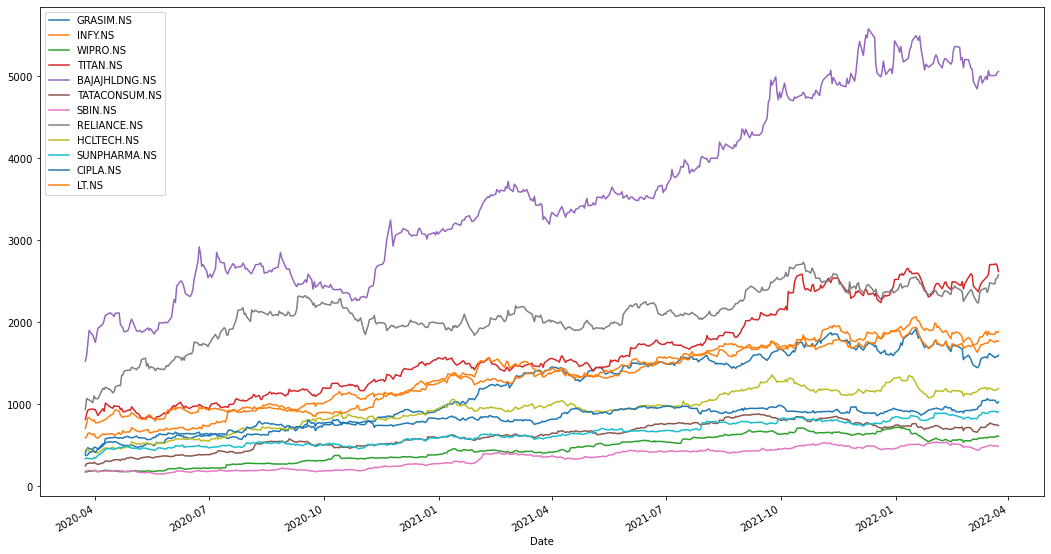

In [453]:
df2 = mydata.drop('^CNX100',axis=1)
# df2 = ((df2/df2.shift(1)) - 1) * 100
df2.plot(figsize=(18,10))

In [163]:
df = mydata['GRASIM.NS']
df = pd.DataFrame({'value':df.values})
df
model = pm.auto_arima(df.value, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
model.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=4564.844, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=4560.849, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=4562.849, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=4562.849, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=4563.810, Time=0.00 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.829 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  496
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -2278.425
Date:                Tue, 03 May 2022   AIC                           4560.849
Time:                        19:49:21   BIC                           4569.259
Sample:                             0   HQIC                          4564.151
                                - 496                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.4228      1.103      2.197      0.028       0.262       4.584
sigma2       582.8206     24.405     23.881      0.000     534.987     630.654
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               169.24
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               4.66   Skew:                            -0.39
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.76
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [164]:
df = mydata['INFY.NS']
df = pd.DataFrame({'value':df.values})
df
model = pm.auto_arima(df.value, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
model.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=4423.753, Time=0.20 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=4423.226, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=4424.894, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=4424.855, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=4428.865, Time=0.02 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.512 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  496
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -2209.613
Date:                Tue, 03 May 2022   AIC                           4423.226
Time:                        19:49:22   BIC                           4431.635
Sample:                             0   HQIC                          4426.527
                                - 496                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.6200      0.946      2.769      0.006       0.766       4.474
sigma2       441.3558     23.234     18.996      0.000     395.817     486.894
===================================================================================
Ljung-Box (L1) (Q):                   0.33   Jarque-Bera (JB):                18.73
Prob(Q):                              0.56   Prob(JB):                         0.00
Heteroskedasticity (H):               1.98   Skew:                             0.11
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.93
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [165]:
df = mydata['WIPRO.NS']
df = pd.DataFrame({'value':df.values})
df
model = pm.auto_arima(df.value, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
model.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3557.250, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3555.722, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3556.003, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3555.875, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3558.676, Time=0.02 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.367 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  496
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -1775.861
Date:                Tue, 03 May 2022   AIC                           3555.722
Time:                        19:49:23   BIC                           3564.132
Sample:                             0   HQIC                          3559.024
                                - 496                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.8772      0.396      2.213      0.027       0.100       1.654
sigma2        76.5022      2.879     26.570      0.000      70.859      82.146
===================================================================================
Ljung-Box (L1) (Q):                   1.73   Jarque-Bera (JB):               305.34
Prob(Q):                              0.19   Prob(JB):                         0.00
Heteroskedasticity (H):               2.92   Skew:                             0.31
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.80
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [166]:
df = mydata['TITAN.NS']
df = pd.DataFrame({'value':df.values})
df
model = pm.auto_arima(df.value, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
model.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=4898.626, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=4894.627, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=4896.625, Time=0.17 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=4896.626, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=4898.331, Time=0.02 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.545 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  496
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -2445.313
Date:                Tue, 03 May 2022   AIC                           4894.627
Time:                        19:49:23   BIC                           4903.036
Sample:                             0   HQIC                          4897.928
                                - 496                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      3.6412      1.549      2.350      0.019       0.604       6.678
sigma2      1143.8746     38.471     29.734      0.000    1068.474    1219.276
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               629.46
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               3.24   Skew:                             0.53
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.42
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [167]:
df = mydata['BAJAJHLDNG.NS']
df = pd.DataFrame({'value':df.values})
df
model = pm.auto_arima(df.value, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
model.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=5589.366, Time=0.37 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5587.818, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5588.787, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5588.752, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5591.219, Time=0.03 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.602 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  496
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -2791.909
Date:                Tue, 03 May 2022   AIC                           5587.818
Time:                        19:49:24   BIC                           5596.228
Sample:                             0   HQIC                          5591.120
                                - 496                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      7.1347      3.067      2.326      0.020       1.124      13.146
sigma2      4640.4386    192.198     24.144      0.000    4263.738    5017.139
===================================================================================
Ljung-Box (L1) (Q):                   1.03   Jarque-Bera (JB):               154.63
Prob(Q):                              0.31   Prob(JB):                         0.00
Heteroskedasticity (H):               1.80   Skew:                            -0.13
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.73
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [168]:
df = mydata['TATACONSUM.NS']
df = pd.DataFrame({'value':df.values})
df
model = pm.auto_arima(df.value, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
model.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3790.128, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3787.127, Time=0.00 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3788.299, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3788.278, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3789.107, Time=0.02 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.342 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  496
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -1891.563
Date:                Tue, 03 May 2022   AIC                           3787.127
Time:                        19:49:24   BIC                           3795.536
Sample:                             0   HQIC                          3790.428
                                - 496                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.9928      0.498      1.995      0.046       0.017       1.968
sigma2       122.0955      5.661     21.568      0.000     111.000     133.191
===================================================================================
Ljung-Box (L1) (Q):                   0.82   Jarque-Bera (JB):                66.44
Prob(Q):                              0.36   Prob(JB):                         0.00
Heteroskedasticity (H):               1.82   Skew:                            -0.13
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.78
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [169]:
df = mydata['SBIN.NS']
df = pd.DataFrame({'value':df.values})
df
model = pm.auto_arima(df.value, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
model.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3412.371, Time=0.25 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3409.503, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3410.920, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3410.870, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3410.769, Time=0.01 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.433 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  496
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -1702.751
Date:                Tue, 03 May 2022   AIC                           3409.503
Time:                        19:49:25   BIC                           3417.912
Sample:                             0   HQIC                          3412.804
                                - 496                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.6139      0.340      1.807      0.071      -0.052       1.280
sigma2        56.9359      2.484     22.923      0.000      52.068      61.804
===================================================================================
Ljung-Box (L1) (Q):                   0.59   Jarque-Bera (JB):               106.40
Prob(Q):                              0.44   Prob(JB):                         0.00
Heteroskedasticity (H):               2.97   Skew:                             0.12
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.26
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [170]:
df = mydata['RELIANCE.NS']
df = pd.DataFrame({'value':df.values})
df
model = pm.auto_arima(df.value, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
model.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=5045.654, Time=0.31 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5042.074, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5043.668, Time=0.18 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5043.658, Time=0.19 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5043.606, Time=0.02 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.732 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  496
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -2519.037
Date:                Tue, 03 May 2022   AIC                           5042.074
Time:                        19:49:25   BIC                           5050.483
Sample:                             0   HQIC                          5045.375
                                - 496                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      3.3214      1.769      1.877      0.060      -0.146       6.789
sigma2      1540.7894     67.829     22.716      0.000    1407.848    1673.731
===================================================================================
Ljung-Box (L1) (Q):                   0.39   Jarque-Bera (JB):               101.25
Prob(Q):                              0.53   Prob(JB):                         0.00
Heteroskedasticity (H):               0.84   Skew:                             0.16
Prob(H) (two-sided):                  0.26   Kurtosis:                         5.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [171]:
df = mydata['HCLTECH.NS']
df = pd.DataFrame({'value':df.values})
df
model = pm.auto_arima(df.value, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
model.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=4244.025, Time=0.25 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=4242.099, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=4243.754, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=4243.680, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=4243.798, Time=0.02 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.487 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  496
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -2119.050
Date:                Tue, 03 May 2022   AIC                           4242.099
Time:                        19:49:26   BIC                           4250.508
Sample:                             0   HQIC                          4245.400
                                - 496                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.5153      0.788      1.924      0.054      -0.029       3.059
sigma2       306.1084     13.599     22.510      0.000     279.456     332.761
===================================================================================
Ljung-Box (L1) (Q):                   0.35   Jarque-Bera (JB):                92.79
Prob(Q):                              0.56   Prob(JB):                         0.00
Heteroskedasticity (H):               1.83   Skew:                            -0.12
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.11
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [412]:
df = mydata['SUNPHARMA.NS']
df = pd.DataFrame({'value':df.values})
df
model = pm.auto_arima(df.value, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=100, max_q=100, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
model.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=3844.632, Time=0.22 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=7843.788, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.06 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=3845.763, Time=0.35 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=3846.210, Time=0.24 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=inf, Time=0.32 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.19 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=3847.712, Time=0.42 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=3844.543, Time=0.30 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=5697.715, Time=0.19 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=3845.669, Time=0.31 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=3846.100, Time=0.37 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=6317.050, Time=0

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  496
Model:               SARIMAX(1, 0, 1)   Log Likelihood               -1918.272
Date:                Thu, 05 May 2022   AIC                           3844.543
Time:                        12:21:03   BIC                           3861.369
Sample:                             0   HQIC                          3851.148
                                - 496                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.6536      1.935      0.338      0.736      -3.139       4.446
ar.L1          0.9990      0.003    308.372      0.000       0.993       1.005
ma.L1         -0.0193      0.045     -0.433      0.665      -0.107       0.068
sigma2       132.2535      5.339     24.771      0.000     121.789     142.718
===================================================================================
Ljung-Box (L1) (Q):                   0.10   Jarque-Bera (JB):               388.25
Prob(Q):                              0.75   Prob(JB):                         0.00
Heteroskedasticity (H):               1.60   Skew:                             0.87
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [173]:
df = mydata['CIPLA.NS']
df = pd.DataFrame({'value':df.values})
df
model = pm.auto_arima(df.value, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
model.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=4096.386, Time=0.18 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=8081.700, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.09 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=4098.062, Time=0.24 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=4098.386, Time=0.24 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=inf, Time=0.19 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.22 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.49 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=4096.182, Time=0.36 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=5639.850, Time=0.27 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=inf, Time=0.17 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=4097.852, Time=0.58 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=4098.179, Time=0.50 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=6235.474, Time=0.02 s

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  496
Model:               SARIMAX(1, 0, 1)   Log Likelihood               -2044.091
Date:                Tue, 03 May 2022   AIC                           4096.182
Time:                        19:49:35   BIC                           4113.008
Sample:                             0   HQIC                          4102.787
                                - 496                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.0874      2.301      0.473      0.637      -3.423       5.597
ar.L1          0.9985      0.003    297.730      0.000       0.992       1.005
ma.L1         -0.0157      0.041     -0.387      0.699      -0.095       0.064
sigma2       219.8120      9.051     24.286      0.000     202.073     237.551
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):               194.53
Prob(Q):                              0.81   Prob(JB):                         0.00
Heteroskedasticity (H):               0.84   Skew:                             0.67
Prob(H) (two-sided):                  0.26   Kurtosis:                         5.76
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [174]:
df = mydata['LT.NS']
df = pd.DataFrame({'value':df.values})
df
model = pm.auto_arima(df.value, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
model.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=4577.193, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=4578.086, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=4577.120, Time=0.16 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=4576.596, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=4579.859, Time=0.02 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=4576.148, Time=0.15 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=4577.074, Time=0.45 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=4577.716, Time=0.25 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=4578.904, Time=0.58 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=4577.827, Time=0.09 sec

Best model:  ARIMA(0,1,2)(0,0,0)[0] intercept
Total fit time: 2.061 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  496
Model:               SARIMAX(0, 1, 2)   Log Likelihood               -2284.074
Date:                Tue, 03 May 2022   AIC                           4576.148
Time:                        19:49:38   BIC                           4592.966
Sample:                             0   HQIC                          4582.750
                                - 496                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.1428      1.130      1.897      0.058      -0.071       4.357
ma.L1          0.0798      0.039      2.049      0.040       0.003       0.156
ma.L2         -0.0718      0.047     -1.518      0.129      -0.164       0.021
sigma2       596.2281     28.730     20.753      0.000     539.918     652.539
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                57.95
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               1.78   Skew:                             0.25
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [395]:
filename = 'after_covid.xlsx'
mydata.to_excel(filename)

In [445]:
df = pd.read_excel('after_covid.xlsx')
df

,Date,GRASIM.NS,INFY.NS,WIPRO.NS,TITAN.NS,BAJAJHLDNG.NS,TATACONSUM.NS,SBIN.NS,RELIANCE.NS,HCLTECH.NS,SUNPHARMA.NS,CIPLA.NS,LT.NS
0,2020-03-24,400.100006,589.799988,176.350006,816.099976,1525.949951,249.050003,183.199997,934.541504,442.049988,335.149994,377.450012,707.900024
1,2020-03-25,451.350006,606.200012,174.649994,880.799988,1594.500000,277.149994,189.899994,1072.087646,457.600006,347.649994,376.450012,765.750000
2,2020-03-26,471.399994,643.000000,182.600006,928.299988,1753.949951,279.049988,192.750000,1056.188354,447.700012,338.299988,386.149994,838.000000
3,2020-03-27,460.899994,652.700012,183.500000,937.049988,1900.000000,284.750000,195.949997,1055.593994,430.649994,338.250000,407.649994,837.049988
4,2020-03-30,450.500000,626.700012,184.149994,943.650024,1841.199951,281.399994,186.899994,1020.774109,419.000000,332.700012,431.750000,798.650024
...,...,...,...,...,...,...,...,...,...,...,...,...,...
491,2022-03-17,1619.849976,1854.599976,601.200012,2703.000000,5008.700195,772.299988,501.899994,2481.699951,1196.900024,911.599976,1048.500000,1787.900024
492,2022-03-21,1569.449951,1853.050049,600.000000,2707.250000,5008.399902,747.799988,490.600006,2467.399902,1168.050049,913.799988,1050.300049,1756.300049
493,2022-03-22,1582.500000,1887.400024,610.049988,2712.750000,5012.600098,752.900024,493.700012,2531.149902,1176.400024,914.099976,1032.599976,1774.050049
494,2022-03-23,1582.099976,1872.400024,611.200012,2690.000000,5046.200195,748.799988,490.649994,2539.199951,1180.699951,900.799988,1014.450012,1767.250000


In [ ]:
df = df.drop('Date',axis=1) 
df

In [399]:
df.describe()

,GRASIM.NS,INFY.NS,WIPRO.NS,TITAN.NS,BAJAJHLDNG.NS,TATACONSUM.NS,SBIN.NS,RELIANCE.NS,HCLTECH.NS,SUNPHARMA.NS,CIPLA.NS,LT.NS
count,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000
mean,1187.419456,1320.781556,450.211190,1633.678123,3555.841231,618.172076,341.565827,2086.541163,930.814616,640.735181,823.638509,1372.322378
std,448.190789,383.901973,163.704880,545.627780,1071.755039,158.227000,124.286805,334.999742,236.304139,140.615984,129.515176,375.364817
min,400.100006,585.700012,174.649994,816.099976,1525.949951,249.050003,150.850006,934.541504,405.799988,332.700012,376.450012,707.900024
25%,721.325012,1008.062500,311.849998,1167.599976,2648.887451,507.425003,198.187496,1954.325012,807.362488,509.287491,751.437500,946.274994
50%,1359.774963,1344.000000,438.899994,1512.024963,3479.125000,630.099976,367.050003,2101.150024,957.700012,623.974976,842.825012,1417.675049
75%,1574.237488,1696.737488,598.037506,2105.962524,4713.562378,748.149994,446.125000,2351.737427,1147.062469,778.362488,924.087494,1705.987488
max,1918.699951,1939.500000,721.500000,2712.750000,5578.149902,882.099976,540.549988,2731.850098,1358.199951,914.099976,1068.050049,2069.399902


<AxesSubplot:>

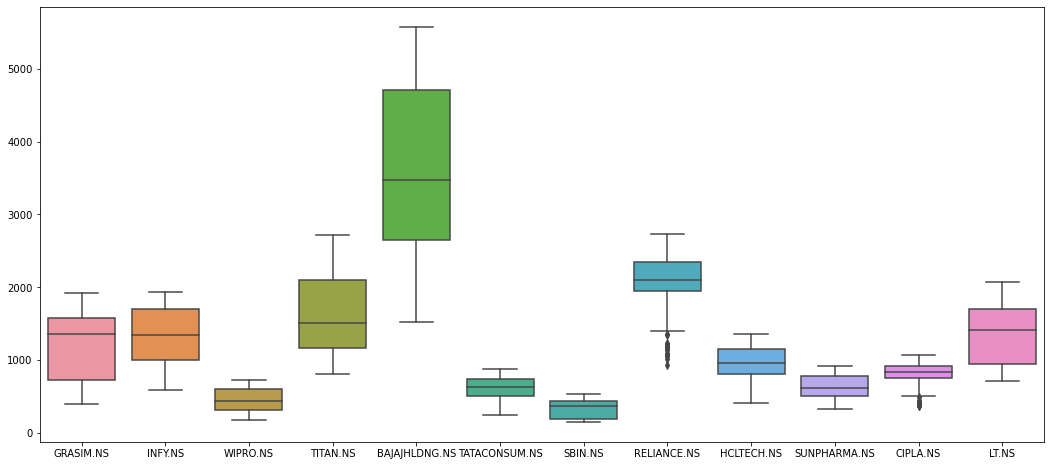

In [429]:
import seaborn as sns
plt.figure(figsize=(18,8))
sns.boxplot(data=df)

In [311]:
df = mydata['BRITANNIA.NS']
df = pd.DataFrame({'value':df.values})
df

,value
0,261.825012
1,269.200012
2,271.174988
3,268.674988
4,266.200012
...,...
1974,2686.000000
1975,2501.949951
1976,2318.149902
1977,2467.800049


In [312]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(df.value.dropna())
print('ADF Statistic:',result[0])
print('p-value:',result[1])

ADF Statistic: -1.1482796703952916
p-value: 0.6954398032351753


In [313]:
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

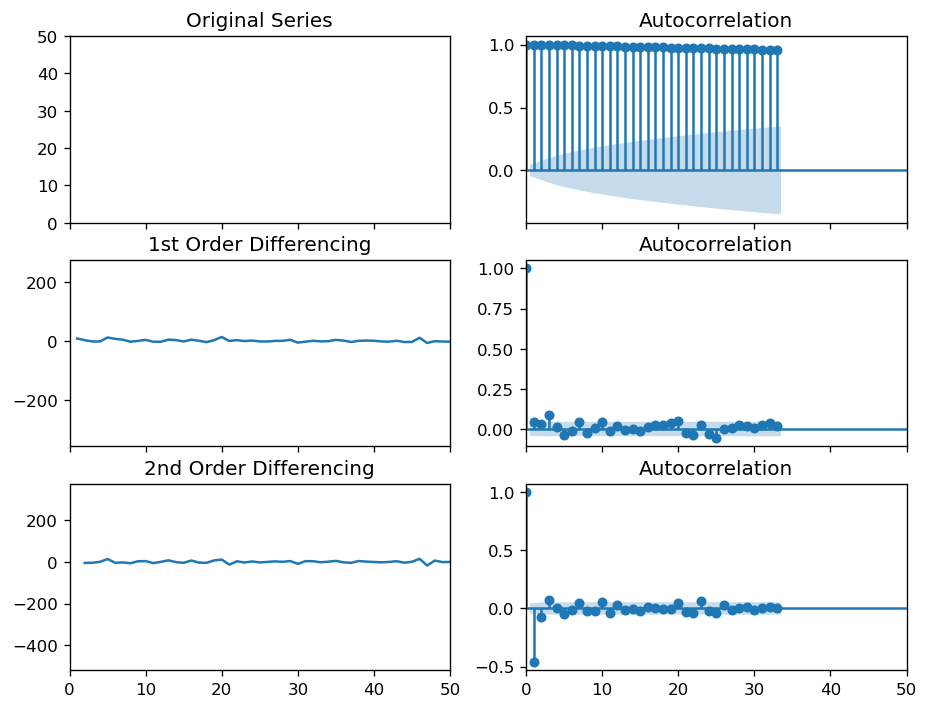

In [314]:
# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(df.value); axes[0, 0].set_title('Original Series')
plot_acf(df.value, ax=axes[0, 1])
axes[0,0].set(ylim=(0,50))
axes[0,0].set(xlim=(0,50))
# axes[1,0].set(ylim=(0,80))
# axes[1,0].set(xlim=(0,80))

# 1st Differencing
axes[1, 0].plot(df.value.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df.value.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df.value.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df.value.diff().diff().dropna(), ax=axes[2, 1])

plt.show()

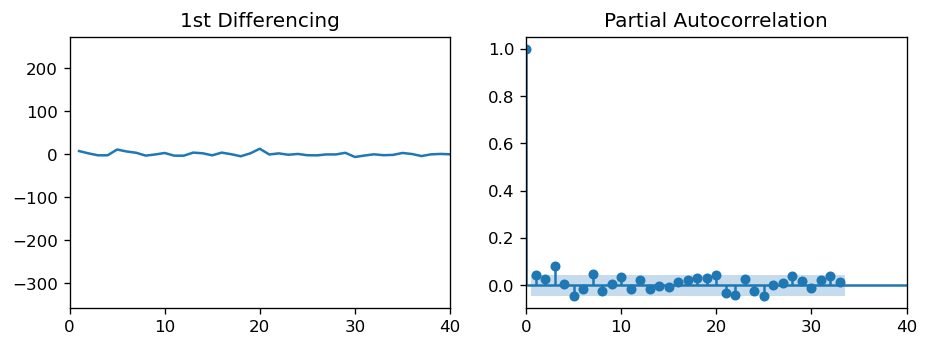

In [315]:
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df.value.diff()); axes[0].set_title('1st Differencing')
# axes[0].set(ylim=(0,))
axes[1].set(xlim=(0,40))
plot_pacf(df.value.diff().dropna(), ax=axes[1])

plt.show()

In [316]:
# plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})
# fig, axes = plt.subplots(1, 2, sharex=True)
# axes[0].plot(df.value.diff()); axes[0].set_title('1st Differencing')
# # axes[1].set(ylim=(0,1.2))
# axes[1].set(xlim=(0,40))

# plot_acf(df.value.diff().dropna(), ax=axes[1])

# plt.show()

In [319]:
from statsmodels.tsa.arima_model import ARIMA

# 1,1,2 ARIMA Model
model = ARIMA(df.value, order=(1,1,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.value   No. Observations:                 1978
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -9484.462
Method:                       css-mle   S.D. of innovations             29.255
Date:                Wed, 04 May 2022   AIC                          18976.924
Time:                        12:24:07   BIC                          18999.284
Sample:                             1   HQIC                         18985.139
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.9020      0.799      1.128      0.259      -0.665       2.469
ar.L1.D.value     0.7696      0.163      4.727      0.000       0.450       1.089
ma.L1.D.value    -0.7203      0.175     

In [26]:
ticker = ['^CNX100','GRASIM.NS',
'INFY.NS',
'WIPRO.NS',
'TITAN.NS',
'BAJAJHLDNG.NS',
'TATACONSUM.NS',
'SBIN.NS',
'RELIANCE.NS',
'HCLTECH.NS',
'SUNPHARMA.NS',
'CIPLA.NS',
'LT.NS',
]
mydata = pd.DataFrame()
for t in ticker:
    mydata[t] = wb.DataReader(t, data_source='yahoo',start='2020-03-24',end='2022-03-24')['Close']
mydata = mydata.dropna()
mydata

In [27]:
mydata = mydata.dropna()
mydata

,^CNX100,GRASIM.NS,INFY.NS,WIPRO.NS,TITAN.NS,BAJAJHLDNG.NS,TATACONSUM.NS,SBIN.NS,RELIANCE.NS,HCLTECH.NS,SUNPHARMA.NS,CIPLA.NS,LT.NS
Date,,,,,,,,,,,,,
2020-03-24,7897.399902,400.100006,589.799988,176.350006,816.099976,1525.949951,249.050003,183.199997,934.541504,442.049988,335.149994,377.450012,707.900024
2020-03-25,8388.200195,451.350006,606.200012,174.649994,880.799988,1594.500000,277.149994,189.899994,1072.087646,457.600006,347.649994,376.450012,765.750000
2020-03-26,8732.099609,471.399994,643.000000,182.600006,928.299988,1753.949951,279.049988,192.750000,1056.188354,447.700012,338.299988,386.149994,838.000000
2020-03-27,8747.049805,460.899994,652.700012,183.500000,937.049988,1900.000000,284.750000,195.949997,1055.593994,430.649994,338.250000,407.649994,837.049988
2020-03-30,8405.299805,450.500000,626.700012,184.149994,943.650024,1841.199951,281.399994,186.899994,1020.774109,419.000000,332.700012,431.750000,798.650024
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-17,17505.400391,1619.849976,1854.599976,601.200012,2703.000000,5008.700195,772.299988,501.899994,2481.699951,1196.900024,911.599976,1048.500000,1787.900024
2022-03-21,17323.650391,1569.449951,1853.050049,600.000000,2707.250000,5008.399902,747.799988,490.600006,2467.399902,1168.050049,913.799988,1050.300049,1756.300049
2022-03-22,17499.199219,1582.500000,1887.400024,610.049988,2712.750000,5012.600098,752.900024,493.700012,2531.149902,1176.400024,914.099976,1032.599976,1774.050049


In [28]:
r = (mydata/mydata.shift(1) - 1)
r = r.dropna()
y = r.drop('^CNX100',axis=1)
X = r[['^CNX100']]

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
lr = LinearRegression()
lr = lr.fit(X,y)
lr.predict(X)


array([[ 7.23604827e-02,  5.06041215e-02,  4.83559372e-02, ...,
         4.04288896e-02,  1.76610867e-02,  6.26808589e-02],
       [ 4.81124604e-02,  3.37813609e-02,  3.23956036e-02, ...,
         2.70570713e-02,  1.22602280e-02,  4.14699550e-02],
       [ 3.07004671e-03,  2.53189491e-03,  2.74815683e-03, ...,
         2.21797467e-03,  2.22775164e-03,  2.06920310e-03],
       ...,
       [ 1.27254024e-02,  9.23057476e-03,  9.10342557e-03, ...,
         7.54251866e-03,  4.37832751e-03,  1.05152042e-02],
       [-2.37514925e-03, -1.24586590e-03, -8.35935227e-04, ...,
        -7.84833964e-04,  1.01492144e-03, -2.69397003e-03],
       [ 4.89082654e-05,  4.35893497e-04,  7.59607953e-04, ...,
         5.51937179e-04,  1.55484143e-03, -5.73531078e-04]])

In [31]:
lr.coef_

array([[1.1465287 ],
       [0.79543716],
       [0.75465868],
       [0.99866837],
       [0.69765544],
       [0.84213099],
       [1.29516589],
       [1.05470654],
       [0.80104655],
       [0.6322649 ],
       [0.25537091],
       [1.00292345]])

In [32]:
r.mean()

^CNX100          0.001680
GRASIM.NS        0.003034
INFY.NS          0.002507
WIPRO.NS         0.002724
TITAN.NS         0.002580
BAJAJHLDNG.NS    0.002637
TATACONSUM.NS    0.002394
SBIN.NS          0.002246
RELIANCE.NS      0.002269
HCLTECH.NS       0.002203
SUNPHARMA.NS     0.002198
CIPLA.NS         0.002220
LT.NS            0.002037
dtype: float64

In [ ]:
ticker = ['ACC.NS',
 'ADANIENT.NS',
 'ADANIGREEN.NS',
 'ADANIPORTS.NS',
 'ADANITRANS.NS',
 'AMBUJACEM.NS',
 'APOLLOHOSP.NS',
 'ASIANPAINT.NS',
 'AUROPHARMA.NS',
 'DMART.NS',
 'AXISBANK.NS',
 'BAJAJ-AUTO.NS',
 'BAJFINANCE.NS',
 'BAJAJFINSV.NS',
 'BAJAJHLDNG.NS',
 'BANDHANBNK.NS',
 'BANKBARODA.NS',
 'BERGEPAINT.NS',
 'BPCL.NS',
 'BHARTIARTL.NS',
 'BIOCON.NS',
 'BOSCHLTD.NS',
 'BRITANNIA.NS',
 'CHOLAFIN.NS',
 'CIPLA.NS',
 'COALINDIA.NS',
 'COLPAL.NS',
 'DLF.NS',
 'DABUR.NS',
 'DIVISLAB.NS',
 'DRREDDY.NS',
 'EICHERMOT.NS',
 'GAIL.NS',
 'GLAND.NS',
 'GODREJCP.NS',
 'GRASIM.NS',
 'HCLTECH.NS',
 'HDFCAMC.NS',
 'HDFCBANK.NS',
 'HDFCLIFE.NS',
 'HAVELLS.NS',
 'HEROMOTOCO.NS',
 'HINDALCO.NS',
 'HINDPETRO.NS',
 'HINDUNILVR.NS',
 'HDFC.NS',
 'ICICIBANK.NS',
 'ICICIGI.NS',
 'ICICIPRULI.NS',
 'ITC.NS',
 'IOC.NS',
 'IGL.NS',
 'INDUSTOWER.NS',
 'INDUSINDBK.NS',
 'NAUKRI.NS',
 'INFY.NS',
 'INDIGO.NS',
 'JSWSTEEL.NS',
 'JINDALSTEL.NS',
 'JUBLFOOD.NS',
 'KOTAKBANK.NS',
 'LTI.NS',
 'LT.NS',
 'LUPIN.NS',
 'M&M.NS',
 'MARICO.NS',
 'MARUTI.NS',
 'MUTHOOTFIN.NS',
 'NMDC.NS',
 'NTPC.NS',
 'NESTLEIND.NS',
 'ONGC.NS',
 'PIIND.NS',
 'PIDILITIND.NS',
 'PEL.NS',
 'POWERGRID.NS',
 'PGHH.NS',
 'PNB.NS',
 'RELIANCE.NS',
 'SBICARD.NS',
 'SBILIFE.NS',
 'SHREECEM.NS',
 'SIEMENS.NS',
 'SBIN.NS',
 'SAIL.NS',
 'SUNPHARMA.NS',
 'TCS.NS',
 'TATACONSUM.NS',
 'TATAMOTORS.NS',
 'TATASTEEL.NS',
 'TECHM.NS',
 'TITAN.NS',
 'TORNTPHARM.NS',
 'UPL.NS',
 'ULTRACEMCO.NS',
 'MCDOWELL-N.NS',
 'VEDL.NS',
 'WIPRO.NS',
 'YESBANK.NS',
 'ZYDUSLIFE.NS']
mydata = pd.DataFrame()
for t in ticker:
    mydata[t] = wb.DataReader(t, data_source='yahoo',start='2012-03-1',end='2020-03-23')['Close']